<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/The_Market's_Not_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Market's Not Normal
---
## Preamble

Hi, this is the first "walk-through" in my project _Financial Data Science in Python_. You can read about what this project is in my article on Medium [Financial Data Science in Python](https://medium.com/adventures-in-data-science/financial-data-science-in-python-ee66dab460cf).

To execute the code in this notebook, you're going to need to upload the my_library.py file from the associated GitHub repository (because Google will delete it when the virtual machine goes away, and so it's likely no longer available here). This is easy, but nothing will work without it.

Once that is done, execute the next cell...

In [1]:
from my_library import *

14:45:04 Starting...
14:45:04 Installing yfinance into Google notebook...
14:45:11 Installing arch into Google notebook...
14:45:22 Initialized.


## First, Get All of the Data
We're going to load data for the S&P 500 Index from _Yahoo! Finance_ into a dataframe. This is done by the `download()` function of the `yfinance` package that should have already been installed by executing the first cell. (You did that, right?) The ticker for the index is `^GSPC` -- I don't know why.

In [3]:
ticker,begin,end='^GSPC','1928-01-27',today('%Y-%m-%d')
df=download(ticker,begin,end).dropna()
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(df)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,NaN,-1.130587,0.000000,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,NaN,0.457404,0.000000,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,NaN,-0.227655,0.000000,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,NaN,0.570442,0.000000,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,NaN,-1.304592,0.000000,-1.304592
...,...,...,...,...,...,...,...,...,...
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2.748450e+09,0.143046,0.170315,-0.027222
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2.698860e+09,0.037017,-0.064554,0.101637
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3.126060e+09,-0.282648,-0.272844,-0.009830


Ok, so there's a lot more than just `download('^GSPC','1928-01-27',today)` going on in that cell, so let's take a deeper look. First, yes, we just call the `yfinance` method that fetches daily data from _Yahoo! Finance_. That's pretty straightforward. We then decorate the returned data-frame with extra return data, taking care to use the `'Adj Close'` column to compute daily returns. As this is a market index, we don't need to worry about dividends but we do need to care about "rebasing" of an index, if that has occurred, and the `'Adj Close'` column is the one that takes care of all of that stuff. I fix the index to business days, via `.to_period('B')`, and drop `NA` records (which will potentially mess up future analytical codes). Note that we drop `NA`'s both _before_ computing returns, so we _elide_ over holiday records that might contain `NA` in the pricing data, and also afterwards, to clean up the data-frame as mentioned. Finanally, because this is a feature of this data set, we change `0` records for `'Volume'` into the `NA`'s they should be returned as (the total volume data for the index constituents is not available early on in the data set, but the prices are still valid).

### Always, Look at the Data
I've already done one, key, step in validating the data returned is "ok" - that is to print it to a terminal and look at the numbers. My process actually involves more in-depth analysis that just the `display(df)` code exhibited, but that is clearly a necessary, if not sufficient, part.
But this is a lot of data, so let's make a picture.

But this is _a lot_ of data, so let's make a picture. To do that I'm going to use a recipe for `matplotlib` which will become very familiar. I've often wondered if I should abstract this into a plotting function, but every plot seems to require its own special stirring, so I'm just going to type the same commands again and again and again.

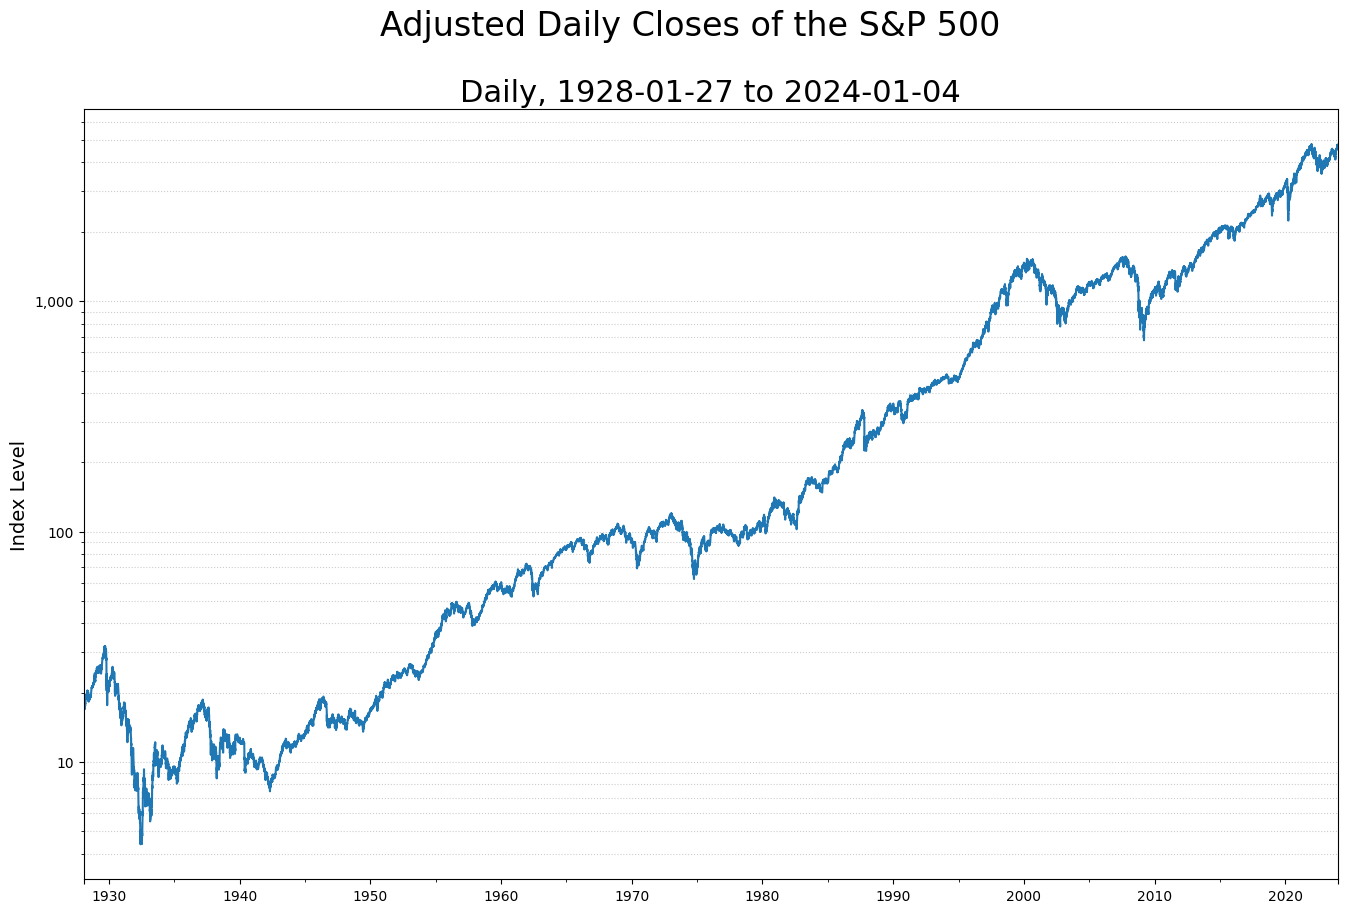

In [10]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
df['Adj Close'].plot(ax=plot)
title='Adjusted Daily Closes of the S&P 500'
figure.suptitle(title,fontsize=24)
plot.set_title("Daily, %s to %s" % (begin,end),fontsize=22)
plot.set_yscale('log')
plot.yaxis.set_major_formatter(CountLabels())
plot.set_ylabel('Index Level',fontsize=14)
plot.set_xlabel(None)
plot.grid(visible=True,which='both',axis='y',alpha=0.2,color='black',linestyle=':')
figure.savefig(title+".png",dpi=300,bbox_inches='tight')